# Styles

- This notebook demonstrates the usage of the Styles, Scale, and MidpointNormalize classes from the Cleopatra package.

- The styles class provides functionality for styling and scaling visualizations.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cleopatra.styles import Styles, Scale, MidpointNormalize
import matplotlib.colors as colors

# 1. Using the Styles Class
-  The Styles class provides methods for getting line and marker styles.

## 1.1 Getting Line Styles
- The get_line_style method returns line styles for matplotlib plots.

 The style name you entered-dashdot-does not exist pleasechoose from the available styles
['solid', 'loosely dotted', 'dotted', 'densely dotted', 'loosely dashed', 'dashed', 'densely dashed', 'loosely dashdotted', 'dashdotted', 'densely dashdotted', 'loosely dashdotdotted', 'dashdotdotted', 'densely dashdotdotted', 'densely dashdotdottededited']


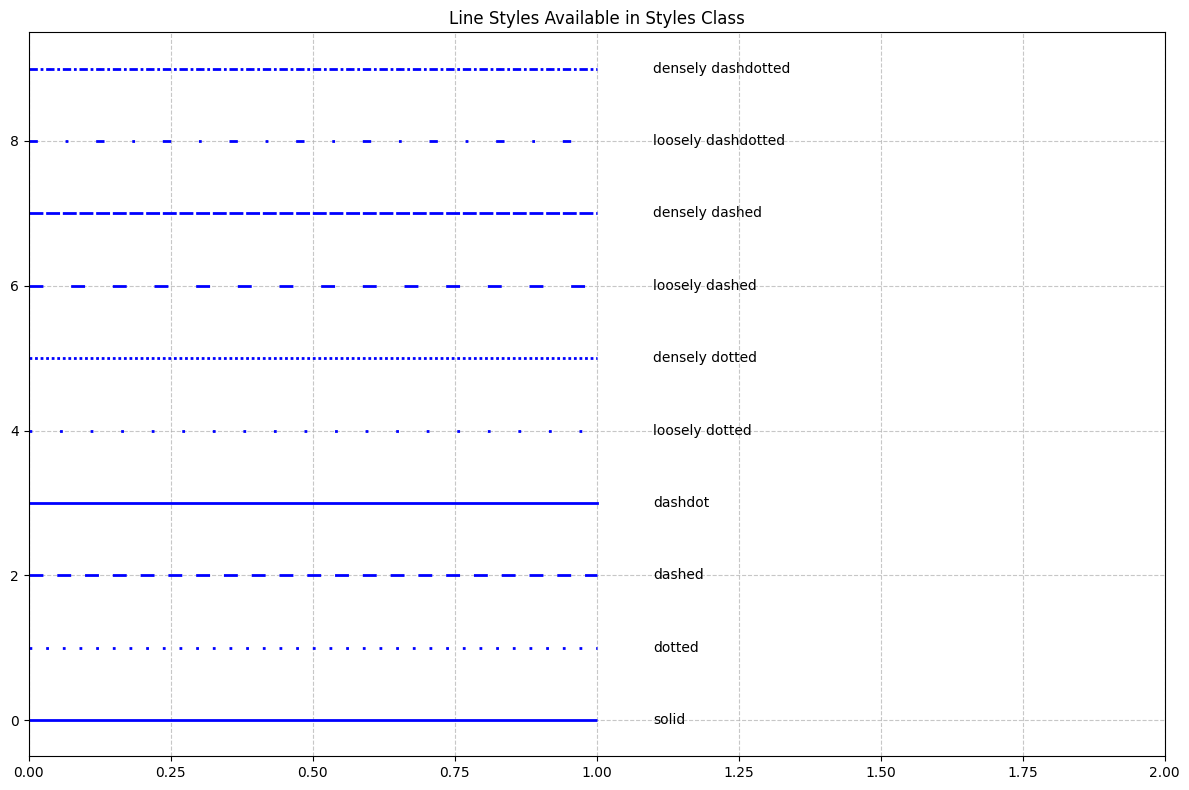

In [14]:
# Get a list of available line style names
line_style_names = [
    "solid", "dotted", "dashed", "dashdot", 
    "loosely dotted", "densely dotted", 
    "loosely dashed", "densely dashed", 
    "loosely dashdotted", "densely dashdotted"
]

# Create a figure to display different line styles
plt.figure(figsize=(12, 8))

# Plot each line style
for i, style_name in enumerate(line_style_names):
    # Get the line style
    line_style = Styles.get_line_style(style_name)

    # Plot a line with this style
    plt.plot([0, 1], [i, i], linestyle=line_style, linewidth=2, color='blue', label=style_name)

    # Add the style name as text
    plt.text(1.1, i, style_name, va='center')

plt.xlim(0, 2)
plt.ylim(-0.5, len(line_style_names) - 0.5)
plt.title("Line Styles Available in Styles Class")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 1.2 Using Standard Matplotlib Markers
- Instead of using Styles.get_marker_style, we'll use standard matplotlib markers.

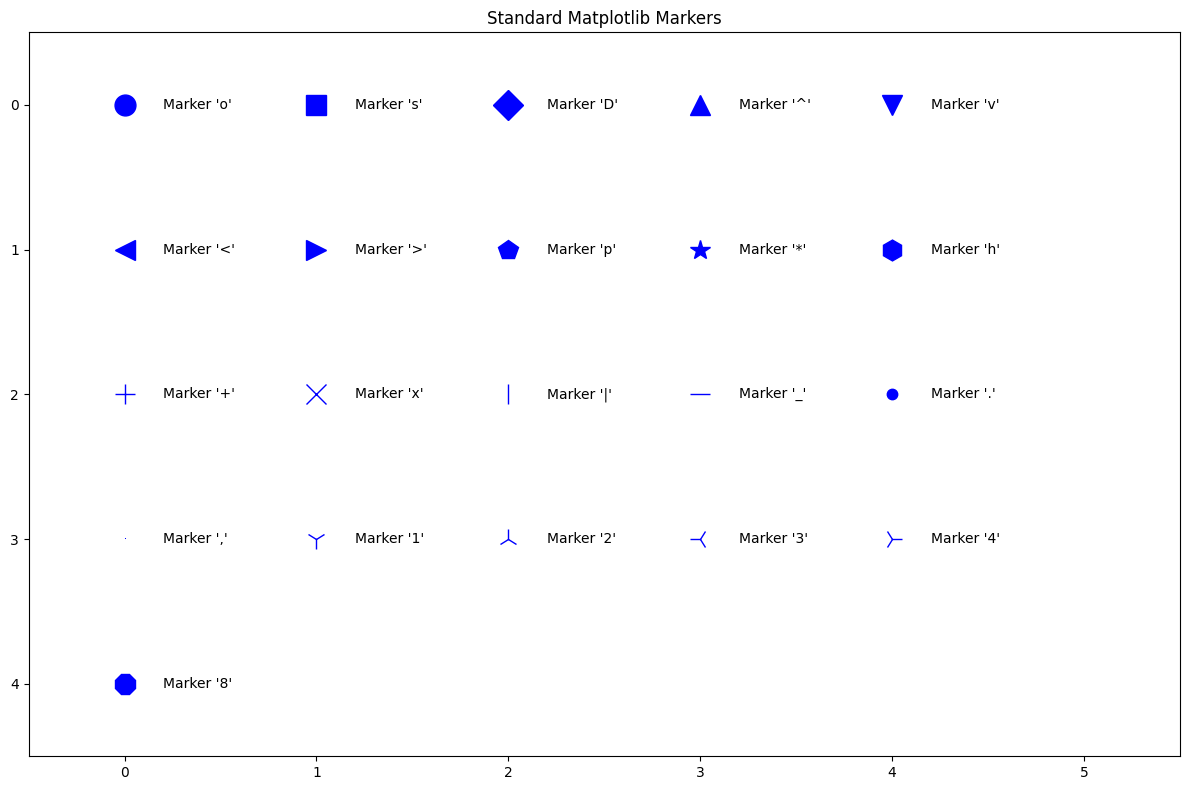

In [15]:
# Create a list of standard matplotlib markers
standard_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', '+', 'x', '|', '_', '.', ',', '1', '2', '3', '4', '8']

# Create a figure to display different marker styles
plt.figure(figsize=(12, 8))

# Plot markers
for i, marker in enumerate(standard_markers):
    if i >= 21:  # Limit to 21 markers to match the original example
        break

    # Calculate grid position (5 markers per row)
    row = i // 5
    col = i % 5

    # Plot the marker
    plt.plot(col, row, marker=marker, markersize=15, color='blue')

    # Add the marker as text
    plt.text(col + 0.2, row, f"Marker '{marker}'", va='center')

plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 4.5)
plt.gca().invert_yaxis()  # Invert y-axis to have marker 0 at the top
plt.title("Standard Matplotlib Markers")
plt.grid(False)
plt.tight_layout()
plt.show()

## 2. Using the Scale Class
- The Scale class provides methods for scaling data in different ways.

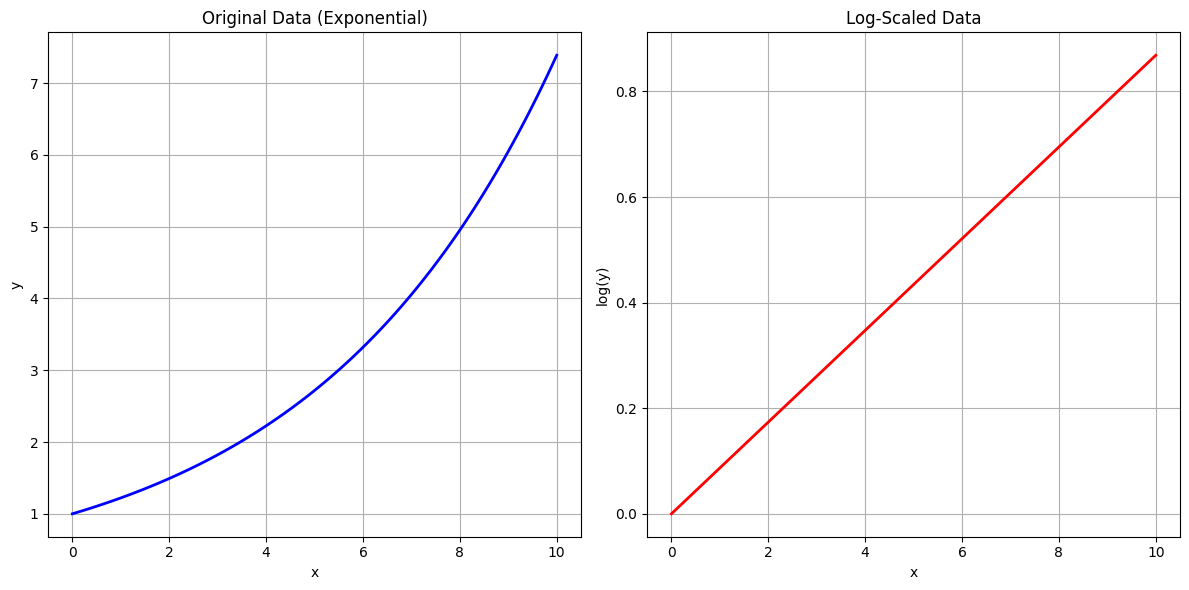

In [16]:
# Create some sample data
x = np.linspace(0, 10, 100)
y = np.exp(x/5)  # Exponential data that grows quickly

# 2.1 Log Scale
# The log_scale method applies a logarithmic scale to the data.

# Apply log scale to the data
y_log = Scale.log_scale(y)

# Plot original and log-scaled data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'b-', linewidth=2)
plt.title("Original Data (Exponential)")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.plot(x, y_log, 'r-', linewidth=2)
plt.title("Log-Scaled Data")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("log(y)")

plt.tight_layout()
plt.show()

## 2.2 Power Scale
- The power_scale method applies a power scale to the data.

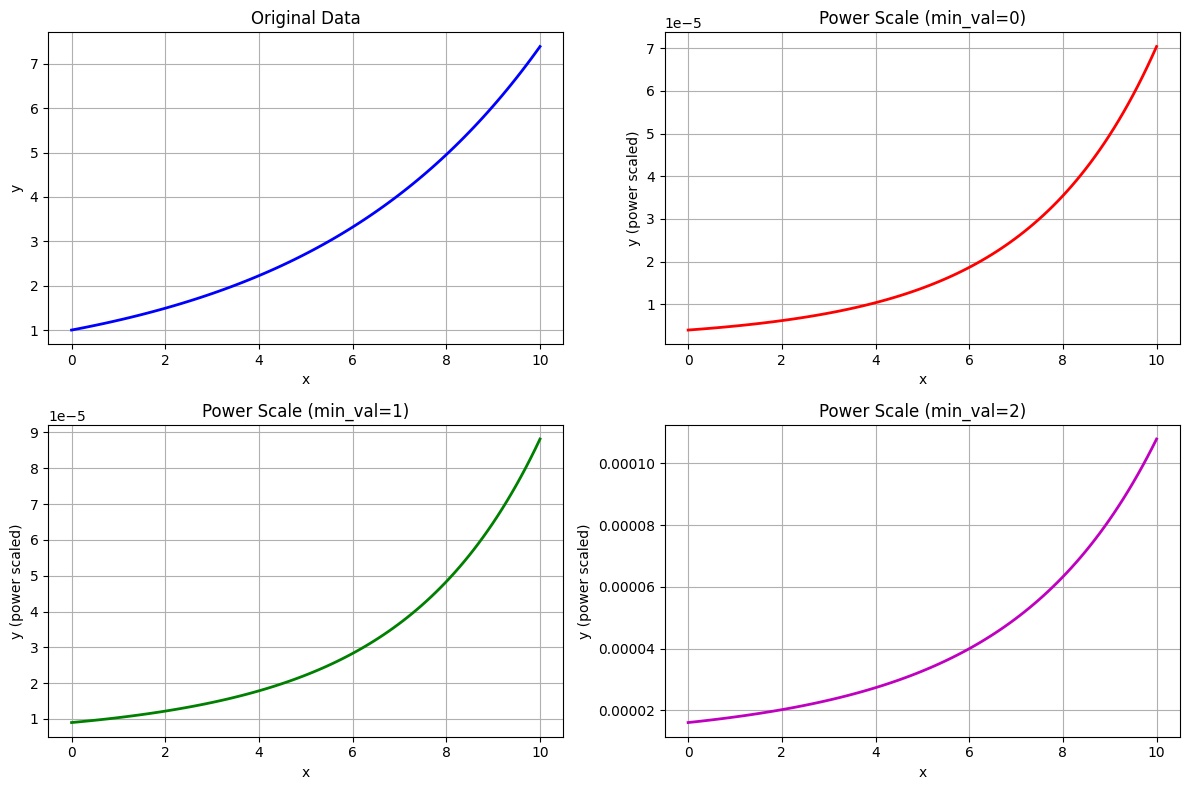

In [17]:
# Create power scale functions with different minimum values
power_scale_func1 = Scale.power_scale(min_val=0)
power_scale_func2 = Scale.power_scale(min_val=1)
power_scale_func3 = Scale.power_scale(min_val=2)

# Apply power scale to the data
y_power_1 = power_scale_func1(y)  # Power scale with min_val=0
y_power_2 = power_scale_func2(y)  # Power scale with min_val=1
y_power_3 = power_scale_func3(y)  # Power scale with min_val=2

# Plot original and power-scaled data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y, 'b-', linewidth=2)
plt.title("Original Data")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(2, 2, 2)
plt.plot(x, y_power_1, 'r-', linewidth=2)
plt.title("Power Scale (min_val=0)")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y (power scaled)")

plt.subplot(2, 2, 3)
plt.plot(x, y_power_2, 'g-', linewidth=2)
plt.title("Power Scale (min_val=1)")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y (power scaled)")

plt.subplot(2, 2, 4)
plt.plot(x, y_power_3, 'm-', linewidth=2)
plt.title("Power Scale (min_val=2)")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y (power scaled)")

plt.tight_layout()
plt.show()

## 2.3 Custom Scaling Function
- Instead of using Scale.identity_scale, we'll create our own scaling function

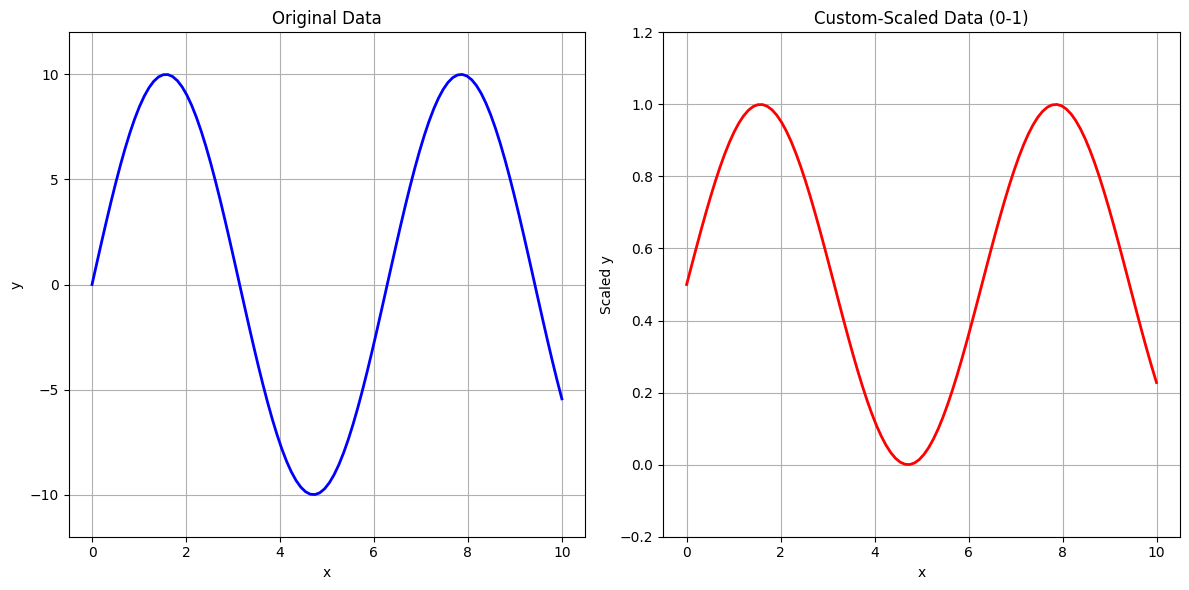

In [18]:
# Create some data with values between -10 and 10
x = np.linspace(0, 10, 100)
y = np.sin(x) * 10

# Create a custom scaling function that scales data to range [0, 1]
def custom_scale(values, old_min=-10, old_max=10):
    """Scale values from range [old_min, old_max] to range [0, 1]"""
    return (values - old_min) / (old_max - old_min)

# Apply custom scale to the data
y_scaled = custom_scale(y)

# Plot original and identity-scaled data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'b-', linewidth=2)
plt.title("Original Data")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-12, 12)

plt.subplot(1, 2, 2)
plt.plot(x, y_scaled, 'r-', linewidth=2)
plt.title("Custom-Scaled Data (0-1)")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("Scaled y")
plt.ylim(-0.2, 1.2)

plt.tight_layout()
plt.show()

## 2.4 Rescale
- The rescale method rescales values from one range to another.

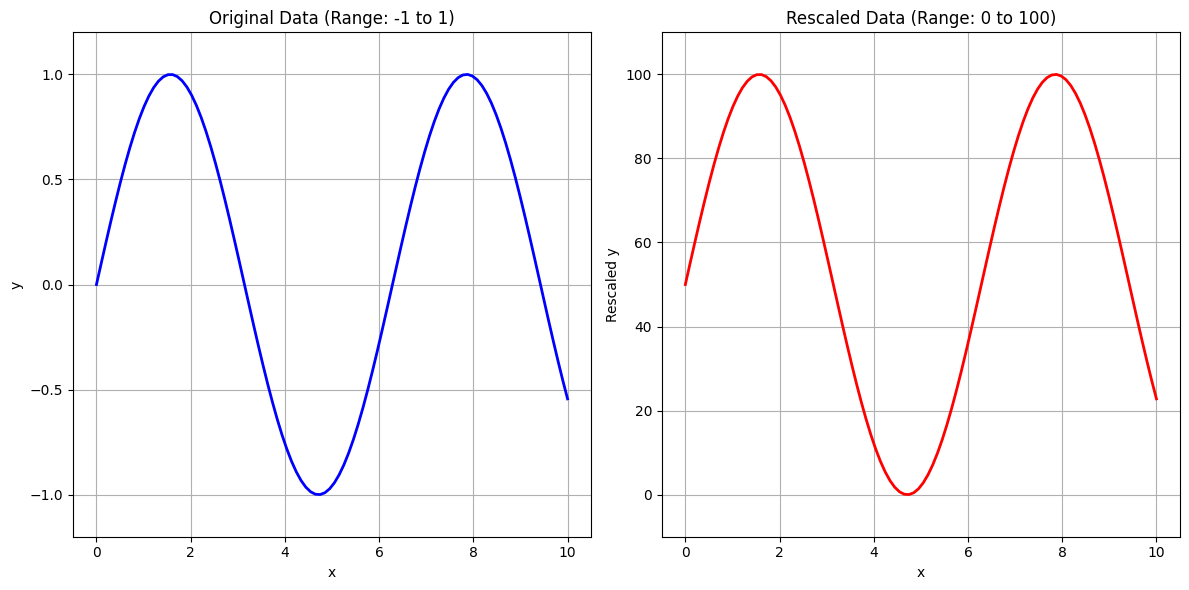

In [19]:
# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)  # Values between -1 and 1

# Rescale the data from range [-1, 1] to range [0, 100]
y_rescaled = Scale.rescale(y, old_min=-1, old_max=1, new_min=0, new_max=100)

# Plot original and rescaled data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'b-', linewidth=2)
plt.title("Original Data (Range: -1 to 1)")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1.2, 1.2)

plt.subplot(1, 2, 2)
plt.plot(x, y_rescaled, 'r-', linewidth=2)
plt.title("Rescaled Data (Range: 0 to 100)")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("Rescaled y")
plt.ylim(-10, 110)

plt.tight_layout()
plt.show()

## 3. Using the MidpointNormalize Class
- The MidpointNormalize class is a normalization that maps a range of values to colors, with a specific midpoint value that maps to a specific color.

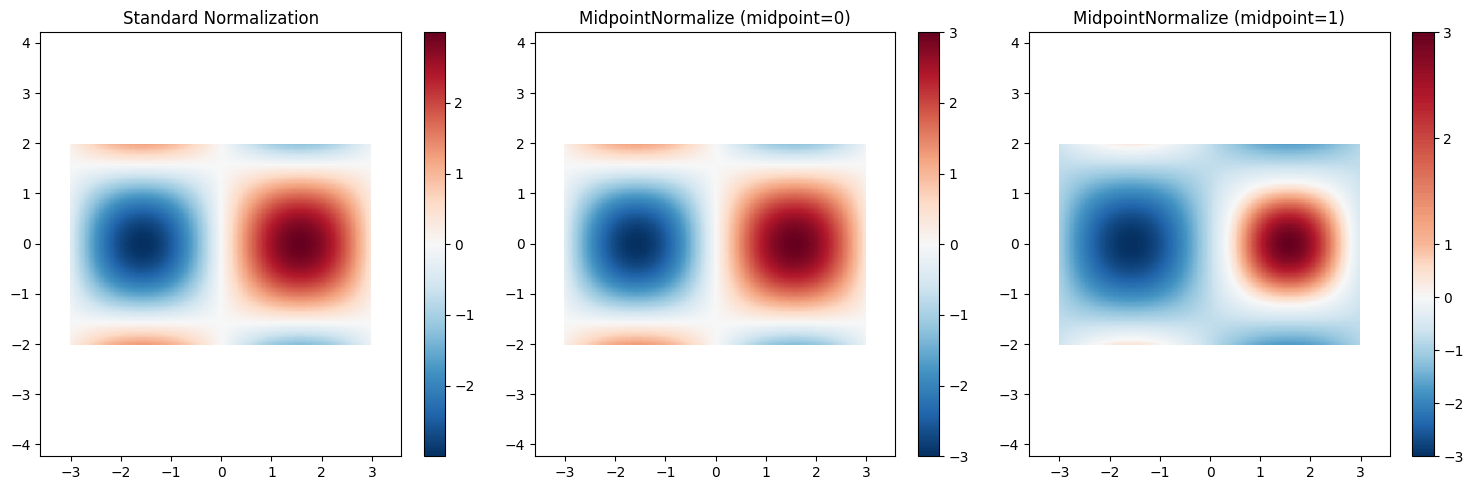

In [20]:
# Create a 2D array with positive and negative values
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y) * 3  # Values between -3 and 3

# 3.1 Standard Normalization
# First, let's use the standard normalization for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
standard_norm = plt.pcolormesh(X, Y, Z, cmap='RdBu_r', shading='auto')
plt.colorbar(standard_norm)
plt.title("Standard Normalization")
plt.axis('equal')

# 3.2 MidpointNormalize with midpoint=0
# Now, let's use MidpointNormalize with midpoint at 0
midpoint_norm_0 = MidpointNormalize(vmin=-3, vmax=3, midpoint=0)
plt.subplot(1, 3, 2)
mid_norm_plot = plt.pcolormesh(X, Y, Z, norm=midpoint_norm_0, cmap='RdBu_r', shading='auto')
plt.colorbar(mid_norm_plot)
plt.title("MidpointNormalize (midpoint=0)")
plt.axis('equal')

# 3.3 MidpointNormalize with midpoint=1
# Let's use MidpointNormalize with midpoint at 1
midpoint_norm_1 = MidpointNormalize(vmin=-3, vmax=3, midpoint=1)
plt.subplot(1, 3, 3)
mid_norm_plot_1 = plt.pcolormesh(X, Y, Z, norm=midpoint_norm_1, cmap='RdBu_r', shading='auto')
plt.colorbar(mid_norm_plot_1)
plt.title("MidpointNormalize (midpoint=1)")
plt.axis('equal')

plt.tight_layout()
plt.show()

## 4. Combining Different Styles and Scales
- Let's combine different styles and scales in a single visualization.

 The style name you entered-dashdot-does not exist pleasechoose from the available styles
['solid', 'loosely dotted', 'dotted', 'densely dotted', 'loosely dashed', 'dashed', 'densely dashed', 'loosely dashdotted', 'dashdotted', 'densely dashdotted', 'loosely dashdotdotted', 'dashdotdotted', 'densely dashdotdotted', 'densely dashdotdottededited']


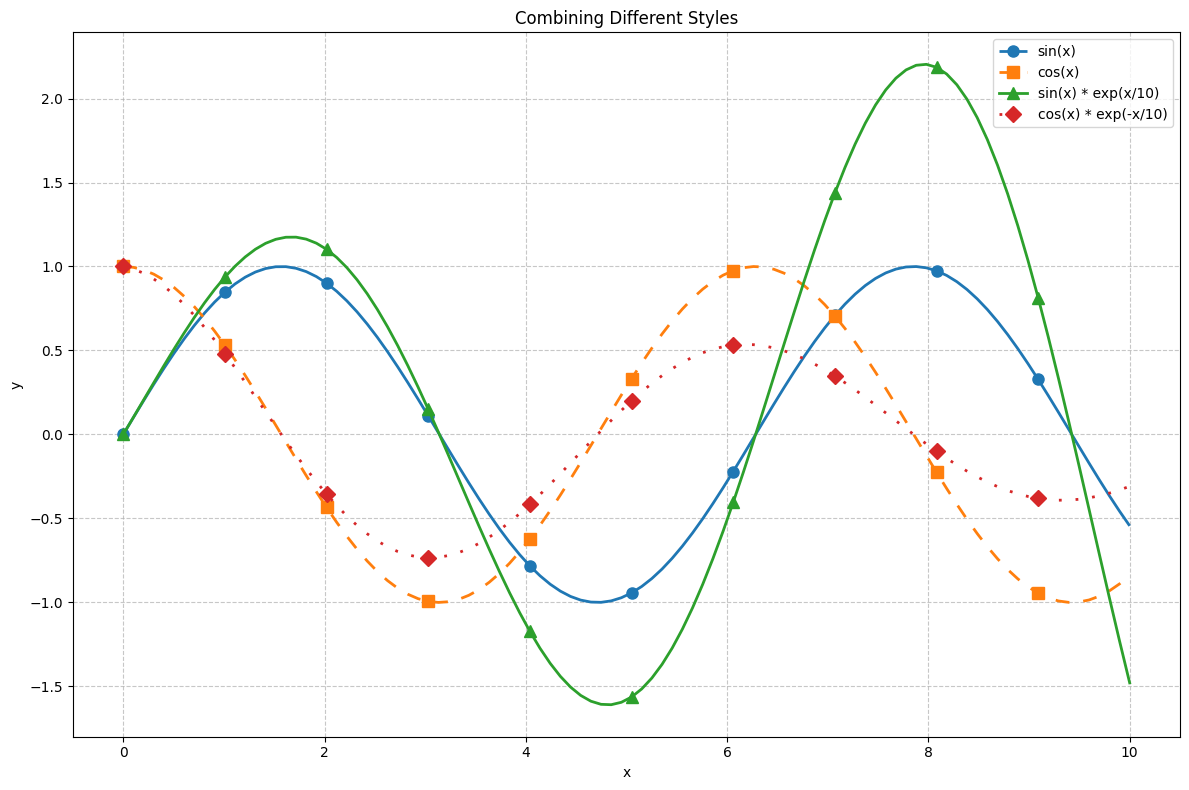

In [21]:
# Create some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.exp(x/10)
y4 = np.cos(x) * np.exp(-x/10)

# Create a figure with different line styles and markers
plt.figure(figsize=(12, 8))

# Define standard matplotlib markers to use
markers = ['o', 's', '^', 'D']

# Plot with solid line style
plt.plot(x, y1, linestyle=Styles.get_line_style("solid"), 
         marker=markers[0], markersize=8, 
         markevery=10, linewidth=2, label="sin(x)")

# Plot with dashed line style
plt.plot(x, y2, linestyle=Styles.get_line_style("dashed"), 
         marker=markers[1], markersize=8, 
         markevery=10, linewidth=2, label="cos(x)")

# Plot with dashdot line style
plt.plot(x, y3, linestyle=Styles.get_line_style("dashdot"), 
         marker=markers[2], markersize=8, 
         markevery=10, linewidth=2, label="sin(x) * exp(x/10)")

# Plot with dotted line style
plt.plot(x, y4, linestyle=Styles.get_line_style("dotted"), 
         marker=markers[3], markersize=8, 
         markevery=10, linewidth=2, label="cos(x) * exp(-x/10)")

plt.title("Combining Different Styles")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Summary
- In this notebook, we've explored the Styles, Scale, and MidpointNormalize classes from the Cleopatra package.
- We've seen how to:
1. Use the Styles class to get line styles
2. Use standard matplotlib markers
3. Use the Scale class to apply different scaling methods:
   - Log scale
   - Power scale
   - Identity scale
   - Rescale
4. Use the MidpointNormalize class to create color maps with specific midpoints
5. Combine different styles and scales in visualizations

These classes provide powerful tools for customizing and enhancing visualizations.